In [4]:
##importing libraries

import numpy as np
import pandas as pd
from textblob import TextBlob
import plotly.graph_objects as go
import plotly .express as xp

In [5]:
pip install textblob


Note: you may need to restart the kernel to use updated packages.


In [6]:
from textblob import TextBlob

In [7]:
trump = pd.read_csv("/home/kipkoech/Desktop/Trumpall2.csv")
biden = pd.read_csv("/home/kipkoech/Desktop/Bidenall2.csv")

In [9]:
trump.head()
# reviews first 5trumps reviews

,user,text
0,manny_rosen,@sanofi please tell us how many shares the Cr...
1,osi_abdul,"https://t.co/atM98CpqF7 Like, comment, RT #P..."
2,Patsyrw,Your AG Barr is as useless &amp; corrupt as y...
3,seyedebrahimi_m,Mr. Trump! Wake Up! Most of the comments bel...
4,James09254677,After 4 years you think you would have figure...


In [10]:
biden.tail()

,user,text
2535,meryn1977,@JoeBiden You'll just try to calm those waters...
2536,BSNelson114,@JoeBiden 96 days 96 dias #VoteJoeBiden2020 #...
2537,KenCapel,@JoeBiden YOU THINK YOU CAN DO THAT??? YOU CAN...
2538,LeslyeHale,@JoeBiden Trump wants our children back at sch...
2539,rerickre,"@JoeBiden ... and I know, because it’s much co..."


In [11]:
biden["text"]

0         @JoeBiden And we’ll find out who won in 2026...
1       @JoeBiden Your Democratic Nazi Party cannot be...
2                             @JoeBiden So did Lying Barr
3       @JoeBiden It's clear you didnt compose this tw...
4              @JoeBiden I will vote in person thank you.
                              ...                        
2535    @JoeBiden You'll just try to calm those waters...
2536    @JoeBiden 96 days 96 dias #VoteJoeBiden2020  #...
2537    @JoeBiden YOU THINK YOU CAN DO THAT??? YOU CAN...
2538    @JoeBiden Trump wants our children back at sch...
2539    @JoeBiden ... and I know, because it’s much co...
Name: text, Length: 2540, dtype: object

In [19]:
polarity= TextBlob(trump['text'][0]).sentiment.polarity
text1=TextBlob(trump['text'][0])
print(f"tweet:",text1) ##extract the first tweet text
print(f"Polarity:",polarity) ##finding its polarity

##now textblob is powerful performing simple text classification
## it classifies as either positive or neg basing on sentiment analysis

tweet:  @sanofi please tell us how many shares the Criminal Trump Enterprise owns.
Polarity: 0.04999999999999999


In [20]:
##subjectivivity
TextBlob(trump['text'][0]).sentiment.subjectivity


0.525

In [21]:
trump.shape

(2788, 2)

In [22]:
biden.shape

(2540, 2)

In [31]:
def findPolarity(review):
    return TextBlob(review).sentiment.polarity

In [33]:
# findPolarity("we dont love Biden")
trump['text'].apply(findPolarity)

0       0.050
1       0.000
2      -0.500
3       0.500
4       0.000
        ...  
2783    0.000
2784    0.000
2785    0.225
2786    0.000
2787   -0.500
Name: text, Length: 2788, dtype: float64

In [34]:
trump['sentiment polarity'] =trump['text'].apply(findPolarity)
biden['sentiment polarity'] =biden['text'].apply(findPolarity)

In [36]:
trump.head()

,user,text,sentiment polarity
0,manny_rosen,@sanofi please tell us how many shares the Cr...,0.05
1,osi_abdul,"https://t.co/atM98CpqF7 Like, comment, RT #P...",0.00
2,Patsyrw,Your AG Barr is as useless &amp; corrupt as y...,-0.50
3,seyedebrahimi_m,Mr. Trump! Wake Up! Most of the comments bel...,0.50
4,James09254677,After 4 years you think you would have figure...,0.00


##Setting polarity on both candidates as positive or negative depending and neutral 

In [40]:
trump['expression_lebal'] = np.where(trump['sentiment polarity']>0, 'positive','negative')
trump['expression_lebal'][trump['sentiment polarity']== 0] = 'neutral'
##apply the same to biden

biden['expression_lebal'] = np.where(biden['sentiment polarity']>0, 'positive','negative')
biden['expression_lebal'][biden['sentiment polarity']== 0] = 'neutral'

/tmp/ipykernel_7952/4042744636.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trump['expression_lebal'][trump['sentiment polarity']== 0] = 'neutral'
/tmp/ipykernel_7952/4042744636.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biden['expression_lebal'][biden['sentiment polarity']== 0] = 'neutral'


In [41]:
trump.head()


,user,text,sentiment polarity,expression_lebal
0,MarkHodder3,@JoeBiden And we’ll find out who won in 2026...,0.00,neutral
1,K87327961G,@JoeBiden Your Democratic Nazi Party cannot be...,0.00,neutral
2,OldlaceA,@JoeBiden So did Lying Barr,0.00,neutral
3,penblogger,@JoeBiden It's clear you didnt compose this tw...,0.05,positive
4,Aquarian0264,@JoeBiden I will vote in person thank you.,0.00,neutral


In [42]:
biden.head()

,user,text,sentiment polarity,expression_lebal
0,MarkHodder3,@JoeBiden And we’ll find out who won in 2026...,0.00,neutral
1,K87327961G,@JoeBiden Your Democratic Nazi Party cannot be...,0.00,neutral
2,OldlaceA,@JoeBiden So did Lying Barr,0.00,neutral
3,penblogger,@JoeBiden It's clear you didnt compose this tw...,0.05,positive
4,Aquarian0264,@JoeBiden I will vote in person thank you.,0.00,neutral


###dropping neutral tweets polarity==0

In [53]:
neut_trump =trump[trump['sentiment polarity'] ==0.0000]
dropneutral = trump['sentiment polarity'].isin(neut_trump['sentiment polarity'])

trump.drop(trump[dropneutral].index, inplace = True)
trump.shape

(1324, 4)

#applying same to biden droping neutral values

In [55]:
neut_biden =biden[biden['sentiment polarity'] ==0.0000]
droping = biden['sentiment polarity'].isin(neut_trump['sentiment polarity'])

biden.drop(biden[droping].index, inplace = True)
biden.shape

(1031, 4)

## The data is not balances to be moved to NLp allgorithm
to balance it>>>

In [59]:
## we have to randomly select data to be removed
# Donald Trump
np.random.seed(10)
remove_n =324
drop_indices = np.random.choice(trump.index, remove_n, replace=False)
subset_trump = trump.drop(drop_indices)
print(subset_trump.shape)
# Joe Biden
np.random.seed(10)
remove_n =31
drop_indices = np.random.choice(biden.index, remove_n, replace=False)
subset_biden = biden.drop(drop_indices)
print(subset_biden.shape)

(1000, 4)
(1000, 4)


# analysing both positive and negative sentiments in trumps and Bidens tweets
>>

In [61]:
count_1 = df_subset_trump.groupby('expression_lebal').count()
print(count_1)

negative_per1 = (count_1['sentiment polarity'][0]/1000)*10
positive_per1 = (count_1['sentiment polarity'][1]/1000)*100




                  user  text  sentiment polarity
expression_lebal                                
negative           449   449                 449
positive           551   551                 551


/tmp/ipykernel_7952/2380315186.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  negative_per1 = (count_1['sentiment polarity'][0]/1000)*10
/tmp/ipykernel_7952/2380315186.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  positive_per1 = (count_1['sentiment polarity'][1]/1000)*100


In [62]:
##bidens

In [65]:
count_2 = df_subset_biden.groupby('expression_lebal').count()
print(count_2)

negative_per2 = (count_2['sentiment polarity'][0]/1000)*100

positive_per2 = (count_2['sentiment polarity'][1]/1000)*100
positive_per2 

                  user  text  sentiment polarity
expression_lebal                                
negative           393   393                 393
positive           607   607                 607


/tmp/ipykernel_7952/3475151841.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  negative_per2 = (count_2['sentiment polarity'][0]/1000)*100
/tmp/ipykernel_7952/3475151841.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  positive_per2 = (count_2['sentiment polarity'][1]/1000)*100


60.699999999999996

In [67]:
negative_per2 

39.300000000000004

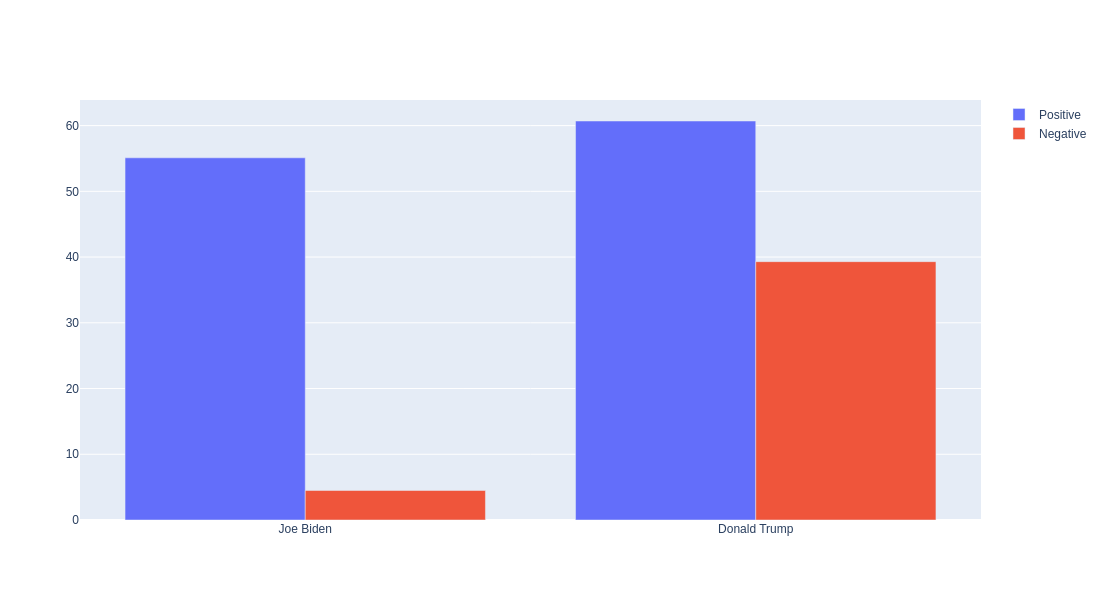

In [82]:
Politicians = ['Joe Biden', 'Donald Trump']
lis_pos = [positive_per1, positive_per2]
lis_neg = [negative_per1, negative_per2]

fig = go.Figure(data=[
    go.Bar(name='Positive', x=Politicians, y=lis_pos),
    go.Bar(name='Negative', x=Politicians, y=lis_neg)
])
# Change the bar mode
fig.update_layout(barmode='group', width= 900, height= 600)
fig.show()

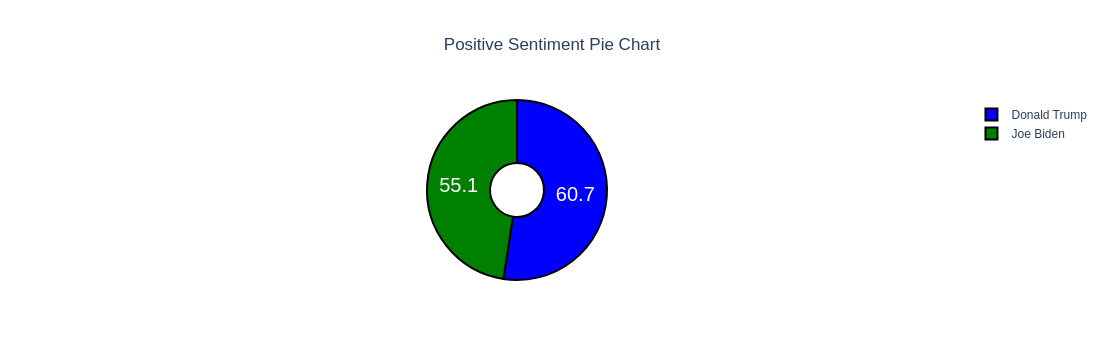

In [79]:
import plotly.graph_objects as go

Politicians = ['Joe Biden', 'Donald Trump']
lis_pos = [positive_per1, positive_per2]
lis_neg = [negative_per1, negative_per2]

# Create pie chart for positive sentiment
fig_pos = go.Figure(data=[go.Pie(labels=Politicians, values=lis_pos, hole=0.3)])
fig_pos.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                      marker=dict(colors=['green', 'blue'], line=dict(color='#000000', width=2)))
fig_pos.update_layout(title_text='Positive Sentiment Pie Chart', title_x=0.5)

# Show both pie charts
fig_pos.show()



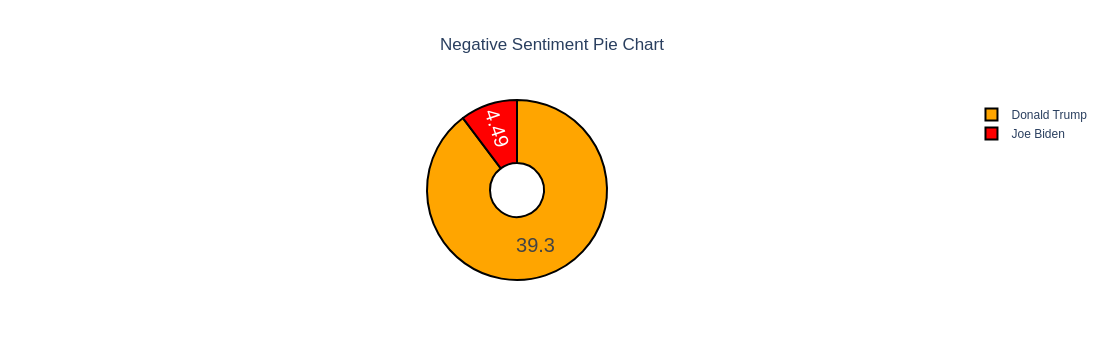

In [80]:
# Create pie chart for negative sentiment
fig_neg = go.Figure(data=[go.Pie(labels=Politicians, values=lis_neg, hole=0.3)])
fig_neg.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                      marker=dict(colors=['red', 'orange'], line=dict(color='#000000', width=2)))
fig_neg.update_layout(title_text='Negative Sentiment Pie Chart', title_x=0.5)

fig_neg.show()